# Business Objective : Predict the percentage of marks of a student based on the number of study hours.

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns


# Dataset Details


In [3]:

# importing data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print(student_data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
# Data Summary

student_data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# This will display the data types details for the given variables
student_data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [6]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [7]:
# Analysis of missing values

print(student_data.isna().sum())  


Hours     0
Scores    0
dtype: int64


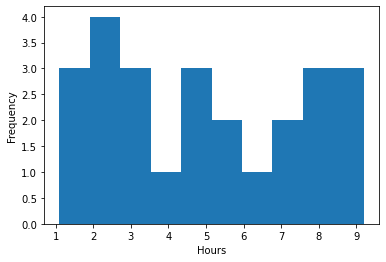

In [8]:
####  Univariate analysis #####

# for hours

# Histogram
hours_hist = plt.hist(student_data['Hours']) 
plt.ylabel("Frequency")
plt.xlabel("Hours")
plt.show()


Text(0, 0.5, 'Hours')

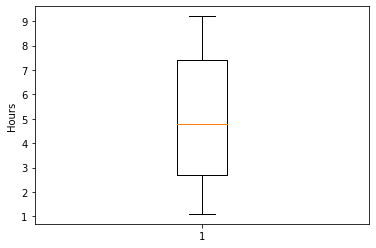

In [9]:
# Boxplot

plt.boxplot(student_data['Hours']);plt.ylabel("Hours")

In [10]:
print("Mean :", student_data.Hours.mean())
print("Median :", student_data.Hours.median())
print("Skewness :",student_data.Hours.skew())

Mean : 5.012
Median : 4.8
Skewness : 0.1903382010052985


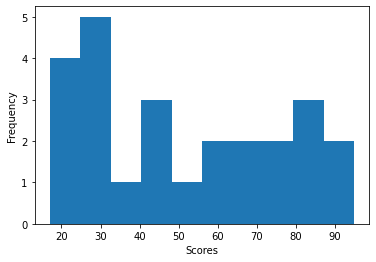

In [11]:
# for hours

# Histogram
hours_hist = plt.hist(student_data['Scores']) 
plt.ylabel("Frequency")
plt.xlabel("Scores")
plt.show()

Text(0, 0.5, 'Scores')

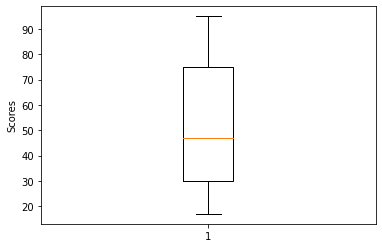

In [12]:
# Boxplot

plt.boxplot(student_data['Scores']);plt.ylabel("Scores")

In [13]:
print("Mean :", student_data.Scores.mean())
print("Median :", student_data.Scores.median())
print("Skewness :",student_data.Scores.skew())

Mean : 51.48
Median : 47.0
Skewness : 0.2339646665397317


From the above analysis, it can be said that that data 
is almost normally distibuted.
From the skewness value it can be said that it is sligtly positvely skewed.
There is no outlier in the data.


In [14]:
# Bivariate Analysis
# The following is the 2-D plot between hours of study and scores 

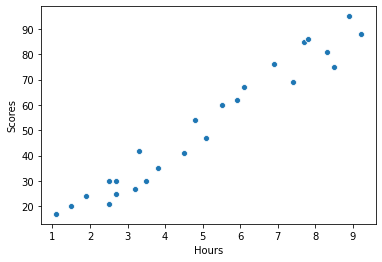

In [15]:
sns.scatterplot("Hours","Scores", data= student_data)


In [16]:
student_data.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [17]:
# Dividing the data between input and output

X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [18]:
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [19]:
# Data Partitioning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [21]:
X_train, y_train, X_test,y_test

(array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64),
 array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]),
 array([20, 27, 69, 30, 62], dtype=int64))

# Model Building

In [22]:
from sklearn.linear_model import LinearRegression

student_lm = LinearRegression()
student_lm.fit(X_train,y_train)


LinearRegression()

In [23]:
# Coefficients and intercepts
print(student_lm.coef_) 
print(student_lm.intercept_)

[9.91065648]
2.018160041434683


In [24]:
# Regression Line
reg_line = student_lm.intercept_ + X*student_lm.coef_ 


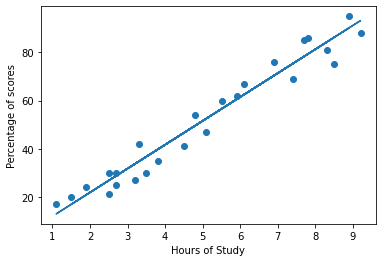

In [25]:
# Plot of regression line
plt.scatter(X,y)
plt.xlabel("Hours of Study")
plt.ylabel("Percentage of scores")
plt.plot(X,reg_line)
plt.show()

In [26]:
# Predictons

y_pred_value = student_lm.predict(X_test) 
y_pred_value # predicted value for test data

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [27]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [28]:
# Actual vs Predicted
print("Actual Scores")
print(y_test)
print("Predicted Scores")
print(y_pred_value)

Actual Scores
[20 27 69 30 62]
Predicted Scores
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [29]:
# Predicted score if a student studies for 9.25 hours/day
hours = np.asarray(9.25)
hours = hours.reshape(1,-1)
y_pred_score = student_lm.predict(hours) 
print("Hours of study : {}".format(hours[0][0]))
print ("Percentage of scores : {} ".format(y_pred_score[0]))

Hours of study : 9.25
Percentage of scores : 93.69173248737538 


# Model Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test,y_pred_value)
print("Mean Absolute Error : " , mse)

import math
RMSE =  math.sqrt(mse)
print("Root Mean Square Error : ", RMSE)

Mean Absolute Error :  4.183859899002975
Root Mean Square Error :  2.0454485813637495
